In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **ML BOOTCAMP DAY 2 ~ DJS COMPUTE X DJS S4DS**

# A Quick Revision:
Let's revise what we learnt yesterday on Day 1:
- Learnt Basic Python
- What is Machine Learning and its types.
- Learnt and implemented libraries like pandas, numpy, matplotlib, and seaborn.
- Loaded the student math performance dataset as a CSV file.
- Explored the dataset using pandas functions for basic understanding, checking the first few rows and descriptive statistics.
- Performed preprocessing by checking for missing values and duplicate rows.
- Performed numerical outliers detection and handled it using IQR clipping.
- Imputed missing values in both categorical **and** numerical columns using appropriate methods (mode for categorical, mean/median for numerical).
- Created new features from existing columns, such as grade progress and social interactions.
- A quick exploratory data analysis (EDA) on the engineered features, including correlation analysis and boxplots.
- Visualized the distribution of the target variable (G3) to assess imbalance.
- Exported the new cleaned dataset as a CSV file.

# **Loading the Cleaned Version of the Dataset**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Day 2/student-mat-with-naive-features.csv')

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,grade_prog_12,grade_prog_23,overall_prog,alcohol_total,social_total,support_count,family_edu_avg,high_absences,long_commute
0,GP,F,18.0,U,GT3,A,4.000000,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,no,no,4.000000,3.000000,4.0,1.0,1.000000,3.0,6.0,5.0,6.000000,6,1.000000,0.000000,1.0,2.000000,7.000000,3,4.000000,0,0
1,GP,F,17.0,U,GT3,T,1.000000,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.000000,3.000000,3.0,1.0,1.000000,3.0,4.0,5.0,10.702247,6,5.702247,-4.702247,1.0,2.000000,6.000000,2,1.000000,0,0
2,GP,F,15.0,U,LE3,T,2.747191,1.0,at_home,other,other,mother,1.0,2.0,0.0,yes,no,yes,yes,yes,yes,yes,no,4.000000,3.000000,2.0,2.0,3.000000,3.0,10.0,7.0,8.000000,10,1.000000,2.000000,3.0,5.000000,5.000000,5,1.873596,1,0
3,GP,F,15.0,U,GT3,T,4.000000,2.0,other,services,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,no,3.000000,2.000000,2.0,1.0,2.263736,5.0,2.0,15.0,14.000000,15,-1.000000,1.000000,0.0,3.263736,4.000000,5,3.000000,0,0
4,GP,F,16.0,U,GT3,T,3.000000,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,no,no,3.946429,3.233696,2.0,1.0,2.000000,5.0,4.0,6.0,10.000000,10,4.000000,0.000000,4.0,3.000000,5.233696,5,3.000000,0,0


In [ ]:
df.drop('grade_prog_12', axis=1, inplace=True)
df.drop('grade_prog_23', axis=1, inplace=True)
df.drop('overall_prog', axis=1, inplace=True)
df.drop('family_edu_avg', axis=1, inplace=True)

# **Encoding**

## What is Encoding in ML?

In machine learning, most algorithms can’t understand words (text) — they only understand numbers.

 So encoding is the process of converting categorical data (like names, colors, cities) into numeric values so that ML models can use them.

 Hence, whenever your dataset has categorical features (non-numeric columns).

Examples:
- Gender = Male/Female
- Color = Red/Green/Blue
- City = Delhi, Mumbai, Pune

If you feed these directly into a model, it won’t know what to do. So, we encode them into numbers.



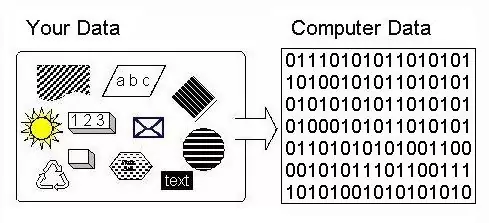

## Types of Encoding
 There are many types of encoding, but in machine learning, there are two most commonly used encoding practices:

 1. Label Encoding
 2. One-hot Encoding

---

### Label Encoding:
It is used when categories have a natural order.

Examples:
- Size = Small < Medium < Large
- Education = High School < Graduate < Post-Graduate

Here, the numbers make sense.

---

### One-Hot Encoding:
It is used when categories have no order.
Examples:
- Color = Red, Green, Blue
- City = Delhi, Mumbai, Pune

Here, assigning numbers like (Delhi = 0, Mumbai = 1, Pune = 2) would wrongly imply some ranking, so one hot encoding is safer.

## Label Encoding v/s One-Hot Encoding

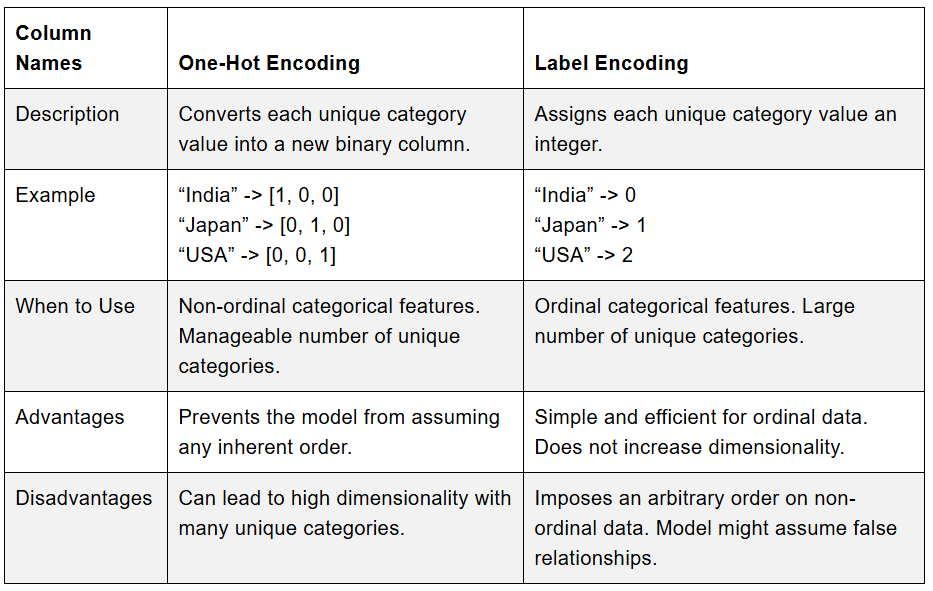


In [ ]:
for col in ["school","sex","address","famsize","Pstatus","Mjob","Fjob",
            "reason","guardian","schoolsup","famsup","paid","activities",
            "nursery","higher","internet","romantic"]:
    print(f"{col}: {df[col].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'other' 'services' 'teacher' 'health']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


Here, in this dataset, we can see that the values of the categorical columns dont have an internal ranking in them.

Hence, we move forward with Label encoding all the categorical columns.

In [ ]:
df.shape

(395, 38)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.shape

(395, 64)

In [ ]:
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alcohol_total,social_total,support_count,high_absences,long_commute,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18.0,4.000000,4.0,2.0,2.0,0.0,4.000000,3.000000,4.0,1.0,1.000000,3.0,6.0,5.0,6.000000,6,2.000000,7.000000,3,0,0,True,False,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False
1,17.0,1.000000,1.0,1.0,2.0,0.0,5.000000,3.000000,3.0,1.0,1.000000,3.0,4.0,5.0,10.702247,6,2.000000,6.000000,2,0,0,True,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,15.0,2.747191,1.0,1.0,2.0,0.0,4.000000,3.000000,2.0,2.0,3.000000,3.0,10.0,7.0,8.000000,10,5.000000,5.000000,5,1,0,True,False,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,True,False
3,15.0,4.000000,2.0,1.0,3.0,0.0,3.000000,2.000000,2.0,1.0,2.263736,5.0,2.0,15.0,14.000000,15,3.263736,4.000000,5,0,0,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,True,False
4,16.0,3.000000,3.0,1.0,2.0,0.0,3.946429,3.233696,2.0,1.0,2.000000,5.0,4.0,6.0,10.000000,10,3.000000,5.233696,5,0,0,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,True,False,True,False,True,True,False,True,False


### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop('G3', axis=1)
y = df['G3']

In [ ]:
y.value_counts()

,count
G3,
10,56
11,47
0,38
15,33
8,32
12,31
13,31
9,28
14,27


In [ ]:
valid_classes = y.value_counts()[y.value_counts() > 1].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

In [ ]:
y.value_counts()

,count
G3,
10,56
11,47
0,38
15,33
8,32
13,31
12,31
9,28
14,27


In [ ]:
sm = SMOTE(random_state=42, k_neighbors=1, sampling_strategy="not majority")
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.Series(y_res, name="G3")], axis=1)

In [ ]:
df_resampled.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,alcohol_total,social_total,support_count,high_absences,long_commute,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
0,18.0,4.000000,4.0,2.0,2.0,0.0,4.000000,3.000000,4.0,1.0,1.000000,3.0,6.0,5.0,6.000000,2.000000,7.000000,3,0,0,True,False,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False,6
1,17.0,1.000000,1.0,1.0,2.0,0.0,5.000000,3.000000,3.0,1.0,1.000000,3.0,4.0,5.0,10.702247,2.000000,6.000000,2,0,0,True,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,6
2,15.0,2.747191,1.0,1.0,2.0,0.0,4.000000,3.000000,2.0,2.0,3.000000,3.0,10.0,7.0,8.000000,5.000000,5.000000,5,1,0,True,False,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True,True,False,10
3,15.0,4.000000,2.0,1.0,3.0,0.0,3.000000,2.000000,2.0,1.0,2.263736,5.0,2.0,15.0,14.000000,3.263736,4.000000,5,0,0,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,True,False,15
4,16.0,3.000000,3.0,1.0,2.0,0.0,3.946429,3.233696,2.0,1.0,2.000000,5.0,4.0,6.0,10.000000,3.000000,5.233696,5,0,0,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,True,False,True,False,True,True,False,True,False,10


In [ ]:
df_resampled.shape

(896, 64)

In [ ]:
df_resampled['G3'].value_counts()

,count
G3,
6,56
10,56
15,56
11,56
19,56
9,56
12,56
14,56
16,56


# **Normalization & Standardization**


When we work with datasets in Machine Learning, the values of features can have very different scales.
Example:

Student’s study hours = 2, 5, 10

Student’s annual income = 50,000, 100,000, 200,000

The second feature (income) has much larger numbers and can dominate the model.
To fix this, we use scaling techniques like Standardization and Normalization.

## Standardization

Standardization is a way to adjust the values of your data so that they all follow the same scale.

It does this by:
- Shifting the data so the average (mean) becomes 0.
- Resizing the data so the spread (standard deviation) becomes 1.

After standardization, the data is centered around 0 and measured in terms of “how many standard deviations away from the mean” each value is.

Formula:

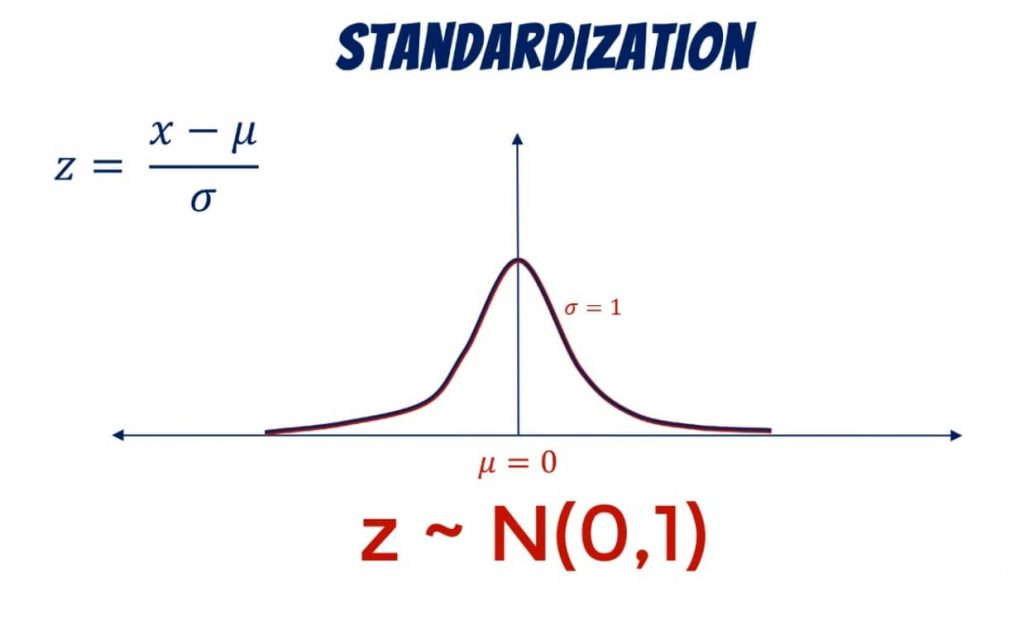

where
𝑥 = value,
𝜇 = mean,
𝜎 = standard deviation.

Example:
- Original exam scores = [50, 60, 70, 80, 90]
- After standardization → [-1.26, -0.63, 0, 0.63, 1.26]

Now all values are centered around 0, regardless of their original scale.

Best for: algorithms that assume data is normally distributed (e.g., Linear Regression, Logistic Regression, SVM, KNN, PCA).

## Normalization (MinMaxScaler)

It transforms data to fit within a fixed range, usually 0 to 1.

Formula:	​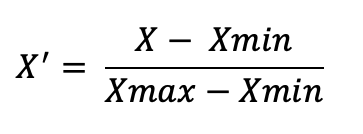


Example:
- Original exam scores = [50, 60, 70, 80, 90]
- After MinMax scaling → [0.0, 0.25, 0.5, 0.75, 1.0]

Now everything is squeezed between 0 and 1.

Best for: algorithms that don’t assume normal distribution and rely on distance (e.g., K-Means, Neural Networks, KNN).

write why we have used min max normalization for this dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df_resampled.drop('G3', axis=1)
y = df_resampled['G3']

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
df_normalized = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

In [ ]:
df_normalized.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,alcohol_total,social_total,support_count,high_absences,long_commute,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
0,0.5,1.000000,1.00,0.333333,0.333333,0.0,0.714286,0.500000,0.75,0.000000,0.000000,0.5,0.214286,0.25,0.300000,0.000000,0.625000,0.500000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,6
1,0.4,0.250000,0.25,0.000000,0.333333,0.0,1.000000,0.500000,0.50,0.000000,0.000000,0.5,0.142857,0.25,0.535112,0.000000,0.500000,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,6
2,0.2,0.686798,0.25,0.000000,0.333333,0.0,0.714286,0.500000,0.25,0.285714,0.500000,0.5,0.357143,0.35,0.400000,0.400000,0.375000,0.833333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,10
3,0.2,1.000000,0.50,0.000000,0.666667,0.0,0.428571,0.250000,0.25,0.000000,0.315934,1.0,0.071429,0.75,0.700000,0.168498,0.250000,0.833333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,15
4,0.3,0.750000,0.75,0.000000,0.333333,0.0,0.698980,0.558424,0.25,0.000000,0.250000,1.0,0.142857,0.30,0.500000,0.133333,0.404212,0.833333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,10


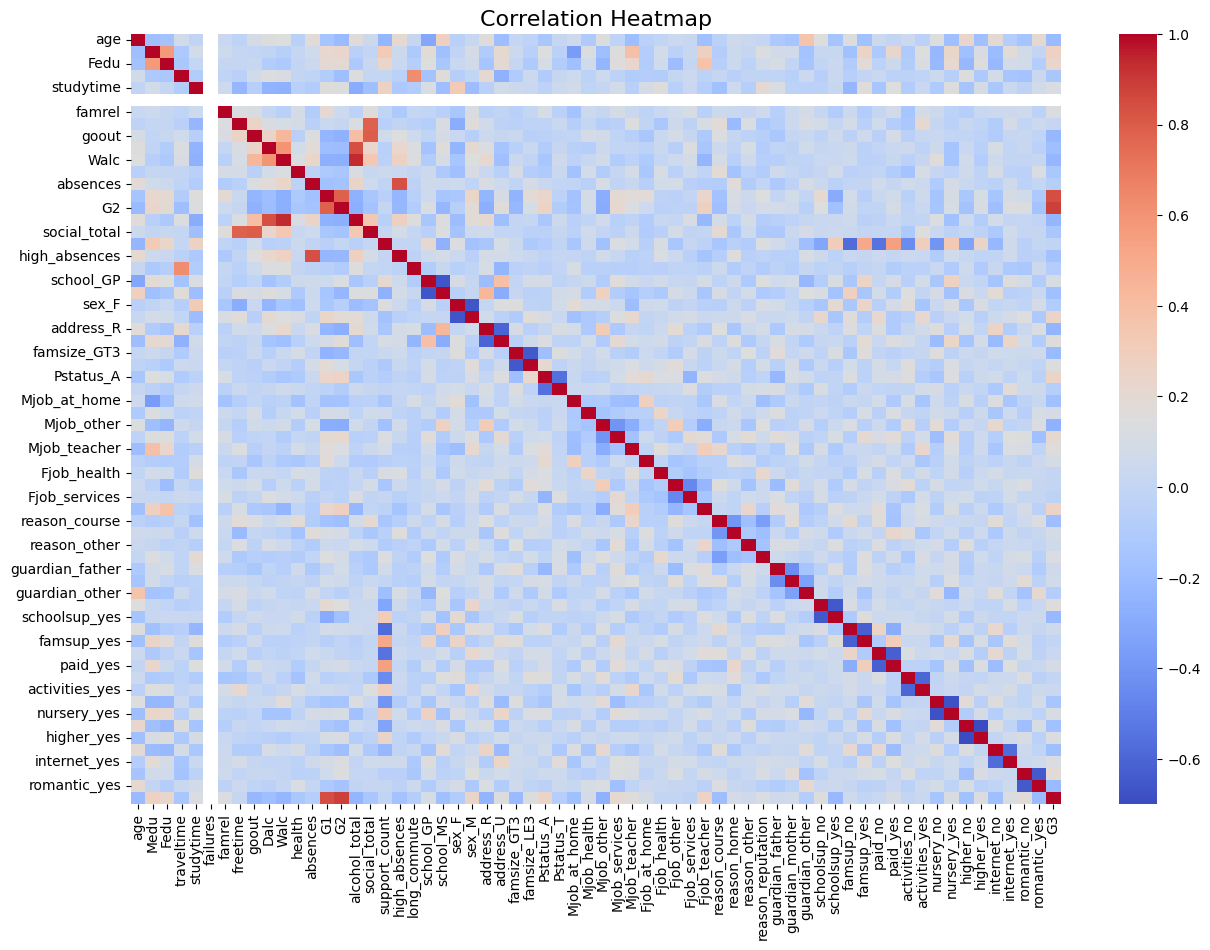

In [ ]:
corr = df_resampled.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=False, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Here, from this correlation heatmap, we can infer that:
 - G1, G2, G3 (grades) are strongly correlated → earlier grades predict final grade well.
- Failures are negatively correlated with grades → more failures = lower grades.
- Absences show weak negative relation with grades → more absences = slightly worse performance.
- Mother’s & Father’s education (Medu, Fedu) are correlated with each other and slightly with grades.
- Daily & weekend alcohol use (Dalc, Walc) are positively correlated with each other and weakly negative with grades.
- Most other social/lifestyle features (activities, internet, romantic, etc.) have little to no correlation with grades.

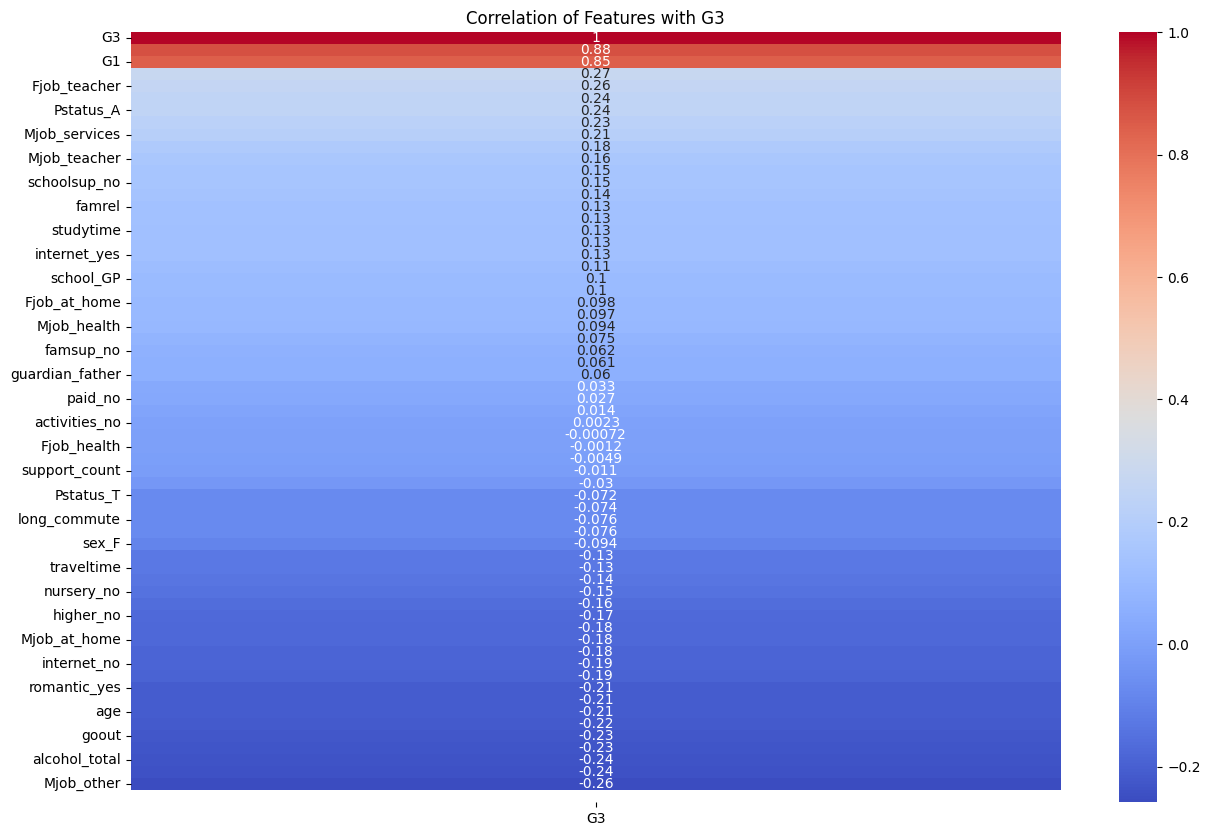

In [ ]:
# Correlation with G3
corr_with_target = corr['G3'].sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation of Features with G3")
plt.show()

Now, from this correlation heatmap of all the features with "G3" attribute are:

**Strongest predictors:**

- G2 (0.88) and G1 (0.85) → previous grades are the best indicators of final grade.

**Moderate positive correlation:**

- Medu (0.26) and Fedu (0.25) → higher parental education slightly improves grades.

- higher (0.19) and internet (0.18) → access to resources helps a little.

**Weak/No correlation:**

- Features like activities, freetime, paid, guardian, etc. have almost no effect.

**Negative correlation:**

- failures (-0.26) → more past failures lower final grades.

- alcohol_total (-0.26) and Walc (-0.25) → more alcohol consumption reduces grades.

- Pstatus (-0.24), goout (-0.21), age (-0.20) also show mild negative impact.

Hence, based on the key observations from above, we will keep only the features that are highly correlated with the target variable.

In [ ]:
selected_features = corr_with_target[abs(corr_with_target) >= 0.25].index.tolist()

print("Selected Features:", selected_features)

Selected Features: ['G3', 'G2', 'G1', 'Medu', 'Fjob_teacher', 'Mjob_other']


# **Train-Test Split**

The main idea behind this is that we want to teach a model to make predictions, but we also want to check if it actually learned correctly.

Hence, we split our dataset into two parts:

Training set → The model learns from this data.

Test set → We check how well the model learned on unseen data.

Example:
Imagine a student learning to solve math problems:

They practice on 80 problems (training set).

Then, the teacher gives them 20 new problems to test if they actually understood (test set).

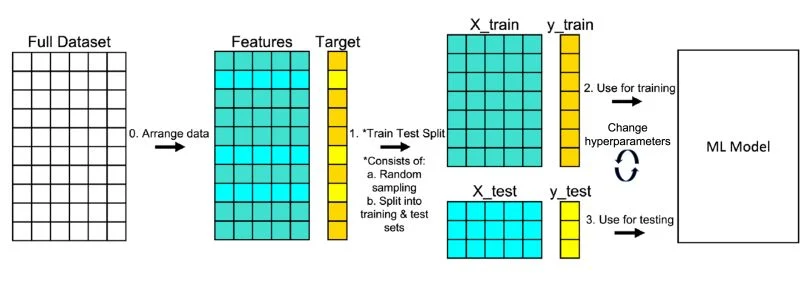

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[selected_features].drop('G3', axis=1)
y = df['G3']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # **Cross Validation**

Sometimes a single train-test split is not enough. Maybe your model got lucky or unlucky depending on which data went to train/test.

Solution: Cross-validation splits the data into multiple chunks (folds) and tests the model multiple times on different data.

Most common: K-Fold CV

1. Split data into k folds (say k=5).

2. Train on 4 folds, test on the remaining 1.

3. Repeat this 5 times, each time a different fold is the test set.

4. Take the average performance → more reliable score.

Example:
Imagine a student has 10 math problems:

They divide them into 5 groups of 2 problems each.

Each time, they practice on 8 problems and test on 2, rotating the test group each time.

Finally, the average score is to see how well they did overall.

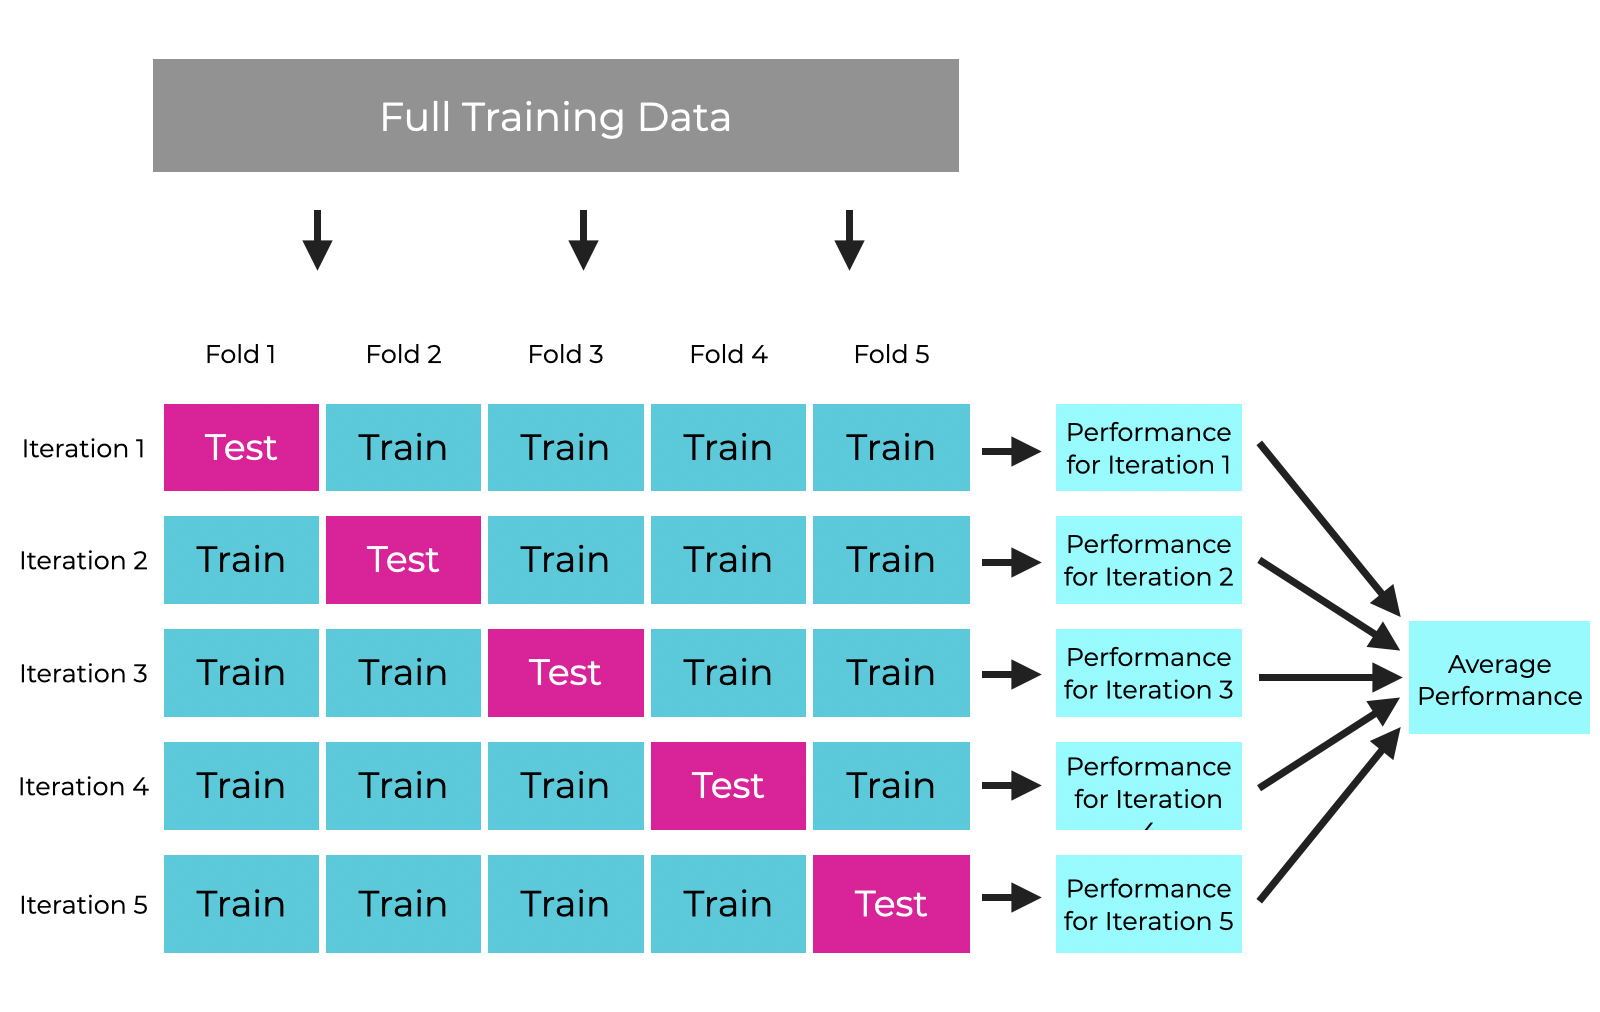

# **Simple Linear Regression**

Linear regression is a type of supervised machine-learning algorithm that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets.

It assumes that there is a linear relationship between the input and output, meaning the output changes at a constant rate as the input changes.

This relationship is represented by a straight line.

Formula:

𝑦 = 𝑚 𝑥 + 𝑐

Example (Hours studied (Input) → Exam score (Output)):

Formula might be:

Score = 30 + 10×Hours

If X=5 → Score = 80.

👉 This is called Simple Linear Regression.

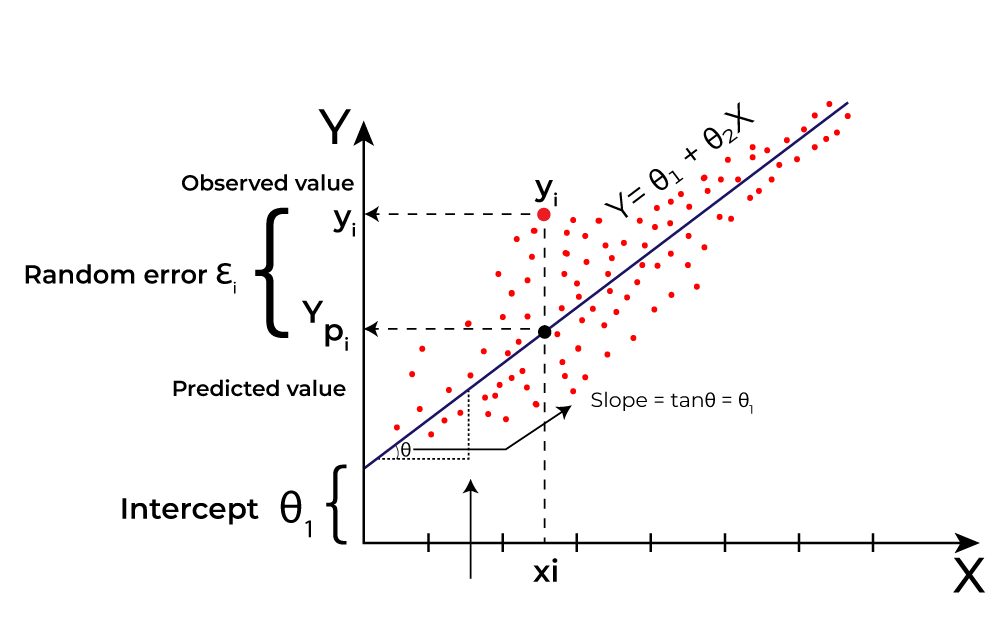

# **Multiple Linear Regression**

Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

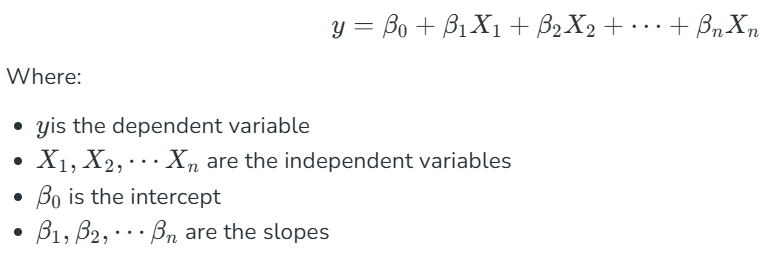

Just like in our case, where we have 5 independant input variables [ 'G2', 'G1', 'Medu', 'Fedu', 'alcohol_total' ] and we are attempting to predict 'G3' dependant variable.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# **Evaluation Metrics for Regression**

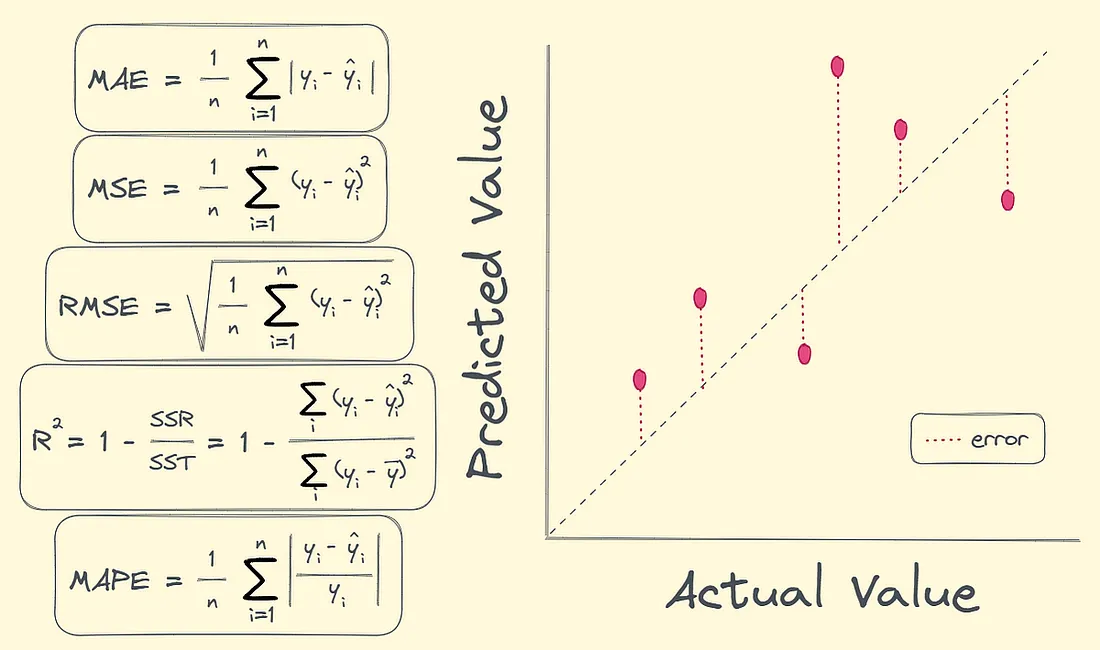

**Mean Squared Error (MSE):** It is a common metric used to measure the average of the squared differences between predicted and actual values. It penalizes larger errors more severely, making it sensitive to outliers.

**Root Mean Squared Error (RMSE):** It is the square root of MSE, bringing the metric back to the same units as the target variable. It provides an easily interpretable measure of average error size.

**Mean Absolute Error (MAE):** It measures the average magnitude of errors in predictions, without considering their direction. It’s calculated as the average of absolute differences between predicted and actual values.

**R² Score:** (the coefficient of determination), indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. It’s a measure of model fit.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Train metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
# Print results
print("=== Train Results ===")
print(f"Mean Squared Error (MSE): {mse_train:.10f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.10f}")
print(f"Mean Absolute Error (MAE): {mae_train:.10f}")
print(f"R² Score: {r2_train:.10f}")

print("\n=== Test Results ===")
print(f"Mean Squared Error (MSE): {mse_test:.10f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.10f}")
print(f"Mean Absolute Error (MAE): {mae_test:.10f}")
print(f"R² Score: {r2_test:.10f}")

=== Train Results ===
Mean Squared Error (MSE): 5.0526733851
Root Mean Squared Error (RMSE): 2.2478152471
Mean Absolute Error (MAE): 1.4589652136
R² Score: 0.7594482413

=== Test Results ===
Mean Squared Error (MSE): 6.5475088476
Root Mean Squared Error (RMSE): 2.5588100452
Mean Absolute Error (MAE): 1.7951444647
R² Score: 0.6806879418


# **Regularization**

Regularization is an important technique in machine learning that helps to improve model accuracy by preventing overfitting which happens when a model learns the training data too well including noise and outliers and perform poor on new data.

By adding a penalty for complexity it helps simpler models to perform better on new data.

In this bootcamp, we will see Lasso and Ridge Regression, which are, L1 & L2 Regularization, respectively.

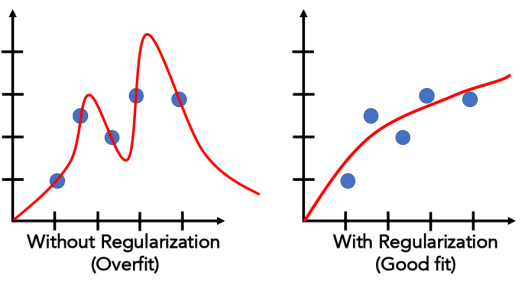

# **Lasso Regression (L1 Regularization)**

-  ### What it is:

Lasso = Linear Regression + penalty.

It adds a rule that says: “Keep the model simple by reducing unnecessary weights.”

-  ### How it works:

Normal linear regression finds coefficients (b1, b2, b3...) for each feature.

Lasso adds an extra cost = sum of absolute values of coefficients.

If a coefficient is not very useful → Lasso can shrink it all the way to 0.

-  ### Why it’s useful:

Helps when you have many features (X variables) as it automatically selects the most important ones → acts like feature selection.

Prevents overfitting (when model memorizes instead of learning patterns).

-  ### Key difference from normal regression:

Normal regression: keeps all features.

Lasso regression: can drop some features by making their weights = 0.

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [ ]:
# Train metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
# Print results
print("=== Train Results ===")
print(f"Mean Squared Error (MSE): {mse_train:.10f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.10f}")
print(f"Mean Absolute Error (MAE): {mae_train:.10f}")
print(f"R² Score: {r2_train:.10f}")

print("\n=== Test Results ===")
print(f"Mean Squared Error (MSE): {mse_test:.10f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.10f}")
print(f"Mean Absolute Error (MAE): {mae_test:.10f}")
print(f"R² Score: {r2_test:.10f}")

=== Train Results ===
Mean Squared Error (MSE): 5.2052231404
Root Mean Squared Error (RMSE): 2.2814958120
Mean Absolute Error (MAE): 1.4317792176
R² Score: 0.7521855293

=== Test Results ===
Mean Squared Error (MSE): 6.4082399170
Root Mean Squared Error (RMSE): 2.5314501609
Mean Absolute Error (MAE): 1.6525272512
R² Score: 0.6874798759


# **Ridge Regression (L2 regularization)**

- ### What it is:

Ridge = Linear Regression + penalty.

Like Lasso, it tries to keep the model simple, but in a different way.

- ### How it works:

Normal regression finds coefficients (b1, b2, b3...).

Ridge adds an extra cost = sum of squares of coefficients.

This makes all coefficients smaller, but never exactly zero.

- ### Why it’s useful:

Helps when you have many correlated features (features that overlap in meaning).

Keeps all features, but makes their impact smaller → avoids overfitting.

- ### Key difference from Lasso:

Lasso: Can make some coefficients = 0 (feature selection).

Ridge: Only shrinks coefficients, never drops them.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [ ]:
# Train metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
# Print results
print("=== Train Results ===")
print(f"Mean Squared Error (MSE): {mse_train:.10f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.10f}")
print(f"Mean Absolute Error (MAE): {mae_train:.10f}")
print(f"R² Score: {r2_train:.10f}")

print("\n=== Test Results ===")
print(f"Mean Squared Error (MSE): {mse_test:.10f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.10f}")
print(f"Mean Absolute Error (MAE): {mae_test:.10f}")
print(f"R² Score: {r2_test:.10f}")

=== Train Results ===
Mean Squared Error (MSE): 5.0526749243
Root Mean Squared Error (RMSE): 2.2478155895
Mean Absolute Error (MAE): 1.4588263984
R² Score: 0.7594481680

=== Test Results ===
Mean Squared Error (MSE): 6.5476665014
Root Mean Squared Error (RMSE): 2.5588408511
Mean Absolute Error (MAE): 1.7950111770
R² Score: 0.6806802532


## Exporting the Model

When we train a machine learning model, it learns patterns from the data and stores them as numbers (like coefficients, weights, etc.). If we close the program, the model will be lost and we’d have to train it again from scratch, which takes time.

To avoid this, we save the trained model into a .pkl (pickle) file. This file stores the model in a ready-to-use format, so later we can just load it and directly make predictions without retraining.

It’s like saving a game — you don’t want to start over every time, you just load your progress and continue.

In [ ]:
import pickle

In [ ]:
with open("/content/drive/MyDrive/Day 2/linear_regression_model.pkl", "wb") as file:
    pickle.dump(lr, file)

In [ ]:
with open("/content/drive/MyDrive/Day 2/lasso_model.pkl", "wb") as file:
    pickle.dump(lasso, file)

In [ ]:
with open("/content/drive/MyDrive/Day 2/ridge_model.pkl", "wb") as file:
    pickle.dump(lr, file)